# **Plant Classification using Deep Learning**

**Setting up working environment:**      

In [1]:
# basic imports
import os
import random

In [2]:
#!gdown --id 1-v22o1HJZl-66RyTWwXApnyXHs4kfseF

In [3]:
!gdown --id 1kkgYT0vSH_kv2eIzzUvCvb4kAOZCFrez

Downloading...
From: https://drive.google.com/uc?id=1kkgYT0vSH_kv2eIzzUvCvb4kAOZCFrez
To: /content/Plant_Data.zip
100% 54.0M/54.0M [00:00<00:00, 129MB/s] 


In [4]:
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [5]:
# Setting up Colab TPU environment for optimal training
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [6]:
# installing libraries for effective use of TPU resources
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl

     |████████████████████████████████| 149.9 MB 26 kB/s 
     |████████████████████████████████| 57 kB 2.4 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.290 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.8.0 which is incompatible.


In [7]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchtext==0.10.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     |█████████████                   | 834.1 MB 1.6 MB/s eta 0:12:28tcmalloc: large alloc 1147494400 bytes == 0x563b2d882000 @  0x7f266aa01615 0x563af3c954cc 0x563af3d7547a 0x563af3c982ed 0x563af3d89e1d 0x563af3d0be99 0x563af3d069ee 0x563af3c99bda 0x563af3d0bd00 0x563af3d069ee 0x563af3c99bda 0x563af3d08737 0x563af3d8ac66 0x563af3d07daf 0x563af3d8ac66 0x563af3d07daf 0x563af3d8ac66 0x563af3d07daf 0x563af3c9a039 0x563af3cdd409 0x563af3c98c52 0x563af3d0bc25 0x563af3d069ee 0x563af3c99bda 0x563af3d08737 0x563af3d069ee 0x563af3c99bda 0x563af3d07915 0x563af3c99afa 0x563af3d07c0d 0x563af3d069ee
     |████████████████▌               | 1055.7 MB 1.4 MB/s eta 0:11:40tcmalloc: large alloc 1434370048 bytes == 0x563b71ed8000 @  0x7f266aa01615 0x563af3c954cc 0x563af3d7547a 0x563af3c982ed 0x563af3d89e1d 0x563af3d0be99 0x563af3d069ee 0x563af3c99bda 0x563af3d0bd00 0x563af3d069ee 0x563af3c99bda 0x563af3d08737 0x563af3d8ac66 0x563a

In [8]:
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

**Downloading Image Dataset from Kaggle:**

In [9]:
#!kaggle datasets download -d muhammadjawad1998/plants-dataset99-classes 

In [10]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  Plant_Data.zip
   creating: Plant_Data/test/
   creating: Plant_Data/test/Almond/
  inflating: Plant_Data/test/Almond/almond_1.jpg  
  inflating: Plant_Data/test/Almond/almond_10.jpg  
  inflating: Plant_Data/test/Almond/almond_11.jpg  
  inflating: Plant_Data/test/Almond/almond_12.jpg  
  inflating: Plant_Data/test/Almond/almond_13.jpg  
  inflating: Plant_Data/test/Almond/almond_14.jpg  
  inflating: Plant_Data/test/Almond/almond_15.jpg  
  inflating: Plant_Data/test/Almond/almond_16.jpg  
  inflating: Plant_Data/test/Almond/almond_17.jpg  
  inflating: Plant_Data/test/Almond/almond_18.jpg  
  inflating: Plant_Data/test/Almond/almond_19.jpg  
  inflating: Plant_Data/test/Almond/almond_2.jpg  
  inflating: Plant_Data/test/Almond/almond_20.jpg  
  inflating: Plant_Data/test/Almond/almond_21.jpg  
  inflating: Plant_Data/test/Almond/almond_22.jpg  
  inflating: Plant_Data/test/Almond/almond_23.jpg  
  inflating: Plant_Data/test/Almond/almond_24.jpg  
  inflating: Plant_Data/te

In [28]:
train_dir  = '/content/Plant_Data/train'
test_dir  = '/content/Plant_Data/test'
val_dir  = '/content/Plant_Data/valid'
# listing six label classes in dataset
classes = os.listdir(train_dir)
print(classes)

['Chamomile', 'Banana', 'Waxflower', 'Mustard', 'Almond']


In [29]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

# Defining PyTorch transformations to set resolution of images to 256x256 pixels, and convert their data to a tensor
transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()]) 

# applying above transformations to whole image dataset and then storing in variable
train_data = ImageFolder(train_dir, transform = transformations) 
test_data = ImageFolder(test_dir, transform = transformations) 
val_data = ImageFolder(val_dir, transform = transformations) 

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label): # function to show image using matplotlib
    figure = plt.figure(figsize=(5, 5))
    plt.title(train_data.classes[label])
    plt.imshow(img.permute(1, 2, 0))

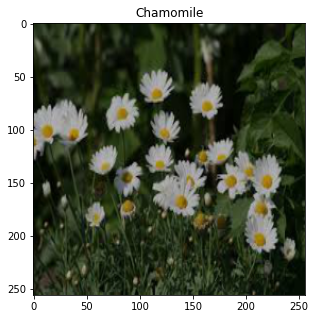

In [31]:
# random image from dataset is plotted
img, label = random.choice(train_data)
show_sample(img, label) 

In [32]:
len(train_data) + len(test_data) + len(val_data) # checking total length of whole dataset

717

**Creating Test, Validation and Testing Datasets and DataLoaders:**

In [33]:
torch.manual_seed(random.randint(1,99)) #setting random seed for random data 

In [34]:
# splitting data into training, validation and testing datasets, with lengths of each printed
#train_data, val_data, test_data = random_split(dataset, [1593, 176, 758])
len(train_data), len(val_data), len(test_data)

(435, 75, 207)

In [35]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32 # setting batch size for epoch training

In [36]:
# configuring DataLoader objects for training and validation data to use in epochs
train_dataloader = DataLoader(train_data, batch_size, shuffle = True, num_workers=4,pin_memory = True)
val_dataloader = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [37]:
from torchvision.utils import make_grid

def show_batch(dl): # function to show batch of images from DataLoader object
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


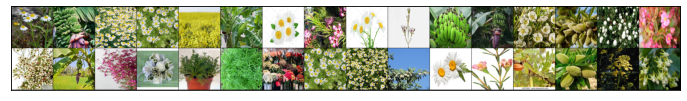

In [38]:
show_batch(train_dataloader) # showing sample batch from training DataLoader

**Defining ML Model:**

In [39]:
# function to compute accuracy of predictions from model
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Base class built by extending nn.Module, functions added for training, validation and end of epoch steps
class ImageClassificationBase(nn.Module):
    def training_step(self, batch): # invoked while training model in epoch for a single training batch
        images, labels = batch # images and labels from labels are fetched from current batch
        out = self(images)                  # Predictions generated for batch images from model
        loss = F.cross_entropy(out, labels) # Cross Entropy Loss calculated and returned
        return loss
    
    def validation_step(self, batch): # invoked while getting predictions/evaluations from model in epoch for a single validation batch
        images, labels = batch 
        out = self(images)                    # Predictions generated for batch images from model
        loss = F.cross_entropy(out, labels)   # Cross Entropy Loss calculated 
        acc = accuracy(out, labels)           # Accuracy calculated
        return {'val_loss': loss.detach(), 'val_acc': acc} # Validation loss, accuracy returned
        
    def validation_epoch_end(self, outputs): # for generating validation metrics at end of each epoch
        batch_losses = [x['val_loss'] for x in outputs] # Validation losses combined into one variable
        epoch_loss = torch.stack(batch_losses).mean()   # Mean of loss values taken for one epoch
        batch_accs = [x['val_acc'] for x in outputs]    # Validation accuracies combined into one variable
        epoch_acc = torch.stack(batch_accs).mean()      # Mean of accuracy values taken for one epoch
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()} 
    
    def epoch_end(self, epoch, result): # for printing epoch data to console
        print("Epoch {} results: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

In [40]:
import torch
import torch_xla
import torch_xla.core.xla_model as xm  # XLA library for using TPU core for accelerated training

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# ResNet50 CNN to be used for image classification, extending above-defined base class 
class ResNet(ImageClassificationBase):
    def __init__(self): 
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(train_data.classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))


model = ResNet()

**Loading Model, DataLoaders on TPU Core, using PyTorch XLA Library:**

In [41]:
# Classes for loading model, data onto TPU cores
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [42]:
DEVICE = xm.xla_device() # instance of TPU core called
train_dataloader = DeviceDataLoader(train_dataloader, DEVICE) # training DataLoader loaded onto TPU core
val_dataloader = DeviceDataLoader(val_dataloader, DEVICE) # validation DataLoader loaded onto TPU core
model = model.train().to(DEVICE) # model loaded onto TPU core

**Training the model:**

In [43]:
from tqdm.notebook import tqdm

@torch.no_grad()

#function for evaluating model using validation DataLoader batch
def evaluate(model, val_loader):
    model.eval() 
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

#function for fitting data onto model and then validating it after each epoch
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = [] # variable to store loss and accuracy values
    optimizer = opt_func(model.parameters(), lr) #optimization function intiliazed with learning rate, weights
    for epoch in range(epochs): # function iterates for inputted number of epochs
        # Training Phase 
        print("Epoch",epoch+1,"training...")
        model.train().to(DEVICE) #at start of each epoch, model is transferred to TPU
        train_losses = [] # array to store training loss for each batch
        for batch in tqdm(train_loader,total=len(train_loader)): # function iterates for entire training dataset
            loss = model.training_step(batch) #model is trained, loss value returned
            train_losses.append(loss) # returned value appended to array
            loss.backward() # gradients computed
            optimizer.step() # gradient descent, parameter values updated
            xm.mark_step() # parameter values updated in TPU
            optimizer.zero_grad() # gradient values reset for next iteration
        # Validation phase
        result = evaluate(model, val_loader) 
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [44]:
num_epochs = 8
opt_func = torch.optim.Adam  # Adam's algorithm used as optimization function
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dataloader, val_dataloader,opt_func)

Epoch 1 training...


  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 1 results: train_loss: 1.4201, val_loss: 1.2005, val_acc: 0.9062
Epoch 2 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 2 results: train_loss: 1.1392, val_loss: 1.0195, val_acc: 0.9922
Epoch 3 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 3 results: train_loss: 1.0199, val_loss: 0.9526, val_acc: 1.0000
Epoch 4 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 4 results: train_loss: 0.9615, val_loss: 0.9315, val_acc: 1.0000
Epoch 5 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 5 results: train_loss: 0.9350, val_loss: 0.9255, val_acc: 1.0000
Epoch 6 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 6 results: train_loss: 0.9282, val_loss: 0.9230, val_acc: 1.0000
Epoch 7 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 7 results: train_loss: 0.9192, val_loss: 0.9203, val_acc: 1.0000
Epoch 8 training...


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 8 results: train_loss: 0.9166, val_loss: 0.9157, val_acc: 1.0000


**Plotting Metrics:**

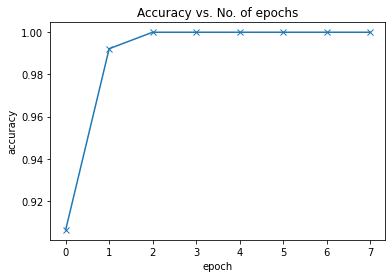

In [45]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

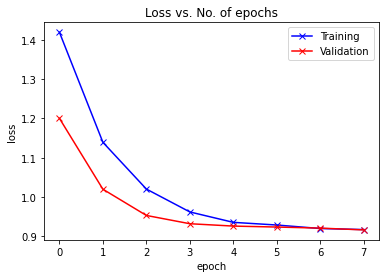

In [46]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

In [47]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), DEVICE)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

In [48]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

test_pred = []
test_true = []
true_pos = 0
false_pos = 0
false_neg = 0

for i in range(len(test_data)):
  img, label = test_data[i]
  out = predict_image(img,model)
  test_true.append(train_data.classes[label])
  test_pred.append(train_data.classes[out]) 

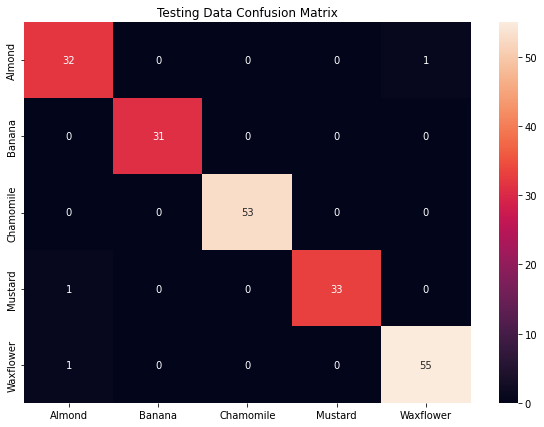

In [49]:
cm = confusion_matrix(test_true,test_pred)
df_cm = pd.DataFrame(cm,index=train_data.classes,columns=train_data.classes)
plt.figure(figsize = (10,7))
plt.title('Testing Data Confusion Matrix')
sn.heatmap(df_cm, annot=True)

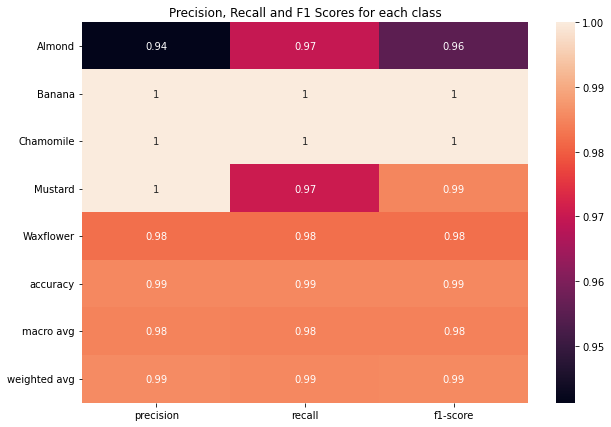

In [50]:
from sklearn.metrics import classification_report

report = classification_report(test_true,test_pred,target_names=train_data.classes,output_dict=True)  
plt.figure(figsize = (10,7))
plt.title('Precision, Recall and F1 Scores for each class')
# .iloc[:-1, :] to exclude support
sn.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

Label: Banana , Predicted: Banana


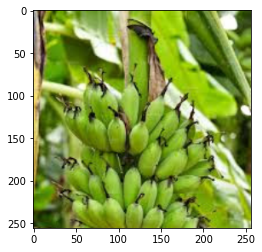

In [65]:
img, label = test_data[random.randint(0,len(test_data))]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_data.classes[label], ', Predicted:', train_data.classes[predict_image(img, model)])